# Challenge 5

## Reading Materials

### Required Reading


## Activity 1
Due: September 6, 2018

In Activity 1, you are tasked with building a binary classifier based on SVM.
Each student has their own files, and should work in place.
```python
student_identity = 'netid'
training = '5challenge_training_' + student_identity + '.csv'
testing = '5challenge_testing_' + student_identity + '.csv'
```

### Deliverables
 1. Fill column ```Class``` in the testing file.
 2. Commit your change on Git.
 3. Describe the Kernel you used for your SVM. Plot the decision region juxtaposed with the training set.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_identity = 'ashishku'

filenameToRead = '5challenge_training_' + student_identity + '.csv'
training_df = pd.read_csv('5Files/' + filenameToRead)

print(training_df.head())

X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df[['Class']].values
colors=np.array(training_df['Class'])

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=colors, s=25, edgecolor='k')
plt.show()


   Unnamed: 0  Class  Feature 0  Feature 1
0           0      1   1.137832   1.317101
1           1      1   0.318304  -0.312743
2           2      0  -0.307529   0.650840
3           3      0  -0.221490   0.706659
4           4      1   0.998161  -0.886530


<Figure size 640x480 with 1 Axes>

In [2]:
training_df=training_df.drop(['Unnamed: 0'],axis=1)

In [3]:
training_df['Feature 0'] = pd.to_numeric(training_df['Feature 0'], errors='coerce')
training_df['Feature 1'] = pd.to_numeric(training_df['Feature 1'], errors='coerce')

In [4]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
y=training_df['Class']
X=training_df[['Feature 0','Feature 1']].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [5]:
# use all the tarining set for training
X_train = X 
X_test = X
y_train = y
y_test = y

In [6]:
best_score=0
best_C = 0
model = "X"
best_gamma=0.0
for c in range(1,10000,100):
# Fit regression model

    from sklearn.metrics import accuracy_score   
    svr_lin = SVC(kernel='linear', C=c)
    svr_poly = SVC(kernel='poly', C=c, degree=2)
    
    y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
    y_poly = svr_poly.fit(X_train, y_train).predict(X_test)
    for g in [0.0001,0.001,.01,.1]:
        svr_rbf = SVC(kernel='rbf', C=c, gamma=g)
        y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
        #print (" gamma = ", g)
        #print (" For C = ", c)
        #print (" RBF:Accuracy on test data = ", accuracy_score(y_test,y_rbf))
        if (best_score < accuracy_score(y_test,y_rbf)):
            best_C = c
            model = "rbf"
            best_gamma = g
            best_score = accuracy_score(y_test,y_rbf)
    #print (" LIN:Accuracy on test data = ", accuracy_score(y_test,y_lin))
    if (best_score < accuracy_score(y_test,y_lin)):
        best_C = c
        model = "linear"
        best_score = accuracy_score(y_test,y_lin)    
    #print (" POL:Accuracy on test data = ", accuracy_score(y_test,y_poly))
    if (best_score < accuracy_score(y_test,y_lin)):
        best_C = c
        model = "poly"
        best_score = accuracy_score(y_test,y_poly) 

print ("best C = ", best_C)
print ("best model = ", model)
print ("best score = ", best_score)
print ("best gamma = ", best_gamma)


best C =  5601
best model =  rbf
best score =  0.885
best gamma =  0.1


In [7]:
testingfile = '5challenge_testing_' + student_identity + '.csv'
testing_df = pd.read_csv('5Files/' + testingfile)
X_test=testing_df[['Feature 0','Feature 1']].values
best_model = SVC(kernel= model, C=best_C, gamma= best_gamma)
class_pred = best_model.fit(X_train, y_train).predict(X_test)

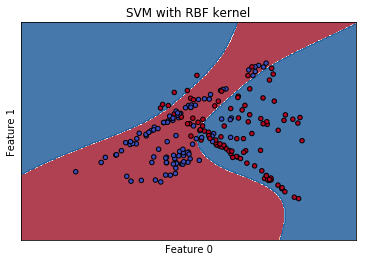

In [8]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
# title for the plots
titles = ('SVM with RBF kernel')
# Set-up 1x1 grid for plotting.
fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
ax=sub
#for title, ax in zip(titles, sub.flatten()):
plot_contours(ax, best_model, xx, yy,cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(titles)
plt.show()

## Analysis on model used and Data set
    
    1. Data set used has almost equal number of class 0 and 1
    2. Feature scaling is not needed as Feature 0 and 1 are within a small range
    3. Number of features is n=2 and training set is m=200.
    4. So linear and Gaussian RBF makes the right fit as m>n
    5. If RBF is used the gamma and C needs to be set for best accuracy for validation set
    6. As per model and parameters search RBF with C = 5601 and gamma = 0.1 as optimum values is the best kernel.
    

In [9]:
testing_df['Class']=class_pred

In [10]:
testing_df=testing_df.drop(['Unnamed: 0'],axis=1)


In [11]:
testing_df.to_csv(testingfile)